In [ ]:
#Importing necessary libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called `planes`, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

The `planes` DataFrame is loaded in the first few lines of code for you to use.

**Instructions:**
1. Print the number of missing values in each column of the DataFrame.
2. Calculate how many observations five percent of the planes DataFrame is equal to.
3. Create `cols_to_drop` by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the `threshold`.
4. Use this filter to remove missing values and save the updated DataFrame.



In [ ]:
#Loading the planes DataFrame from dataset file
planes = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/planes.csv?raw=True')


# Step 1: Print the number of missing values in each column
print("Missing values in each column:")
print(planes.isnull().sum())

# Step 2: Calculate the threshold for 5% of the data
threshold = 0.05 * len(planes)
print(f"\nFive percent threshold: {threshold} rows")

# Step 3: Identify columns with missing values greater than the threshold
cols_to_drop = planes.columns[planes.isnull().sum() > threshold]
print(f"\nColumns with missing values exceeding 5% threshold: {cols_to_drop}")

# Step 4: Drop rows where the missing values exceed the threshold and update the DataFrame
planes_cleaned = planes.dropna(subset=cols_to_drop)

# Step 5: Check the number of missing values after the cleaning
print(f"\nMissing values after cleaning:")
print(planes_cleaned.isnull().sum())


Missing values in each column:
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

Five percent threshold: 533.0 rows

Columns with missing values exceeding 5% threshold: Index(['Additional_Info', 'Price'], dtype='object')

Missing values after cleaning:
Airline            346
Date_of_Journey    289
Source             149
Destination        202
Route              230
Dep_Time            73
Arrival_Time       181
Duration           181
Total_Stops        136
Additional_Info      0
Price                0
dtype: int64


# **Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of `11` columns!

Now, you need to decide what to do with the `"Additional_Info"` and `"Price"` columns, which are missing `300` and `368` values respectively.

You'll first take a look at what `"Additional_Info"` contains, then visualize the price of plane tickets by different airlines.

The `planes` DataFrame is loaded previously and the following imports have been made for you:
```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```
**Instructions:**
1. Print the values and frequencies of `"Additional_Info"`.
2. Create a boxplot of `"Price"` versus `"Airline"`.
3. How should you deal with the missing values in `"Additional_Info"` and `"Price"`? Print either A, B, C or D as choice in the codecell below.
* A. Remove the `"Additional_Info"` column and impute the mean for missing values of `"Price"`.
* B. Remove `"No info"` values from `"Additional_Info"` and impute the median for missing values of `"Price"`.
C. Remove the `"Additional_Info"` column and impute the mean by `"Airline"` for missing values of `"Price"`.
D. Remove the `"Additional_Info"` column and impute the median by `"Airline"` for missing values of `"Price"`.



Value counts of 'Additional_Info':
Additional_Info
No info                         7867
In-flight meal not included     1874
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


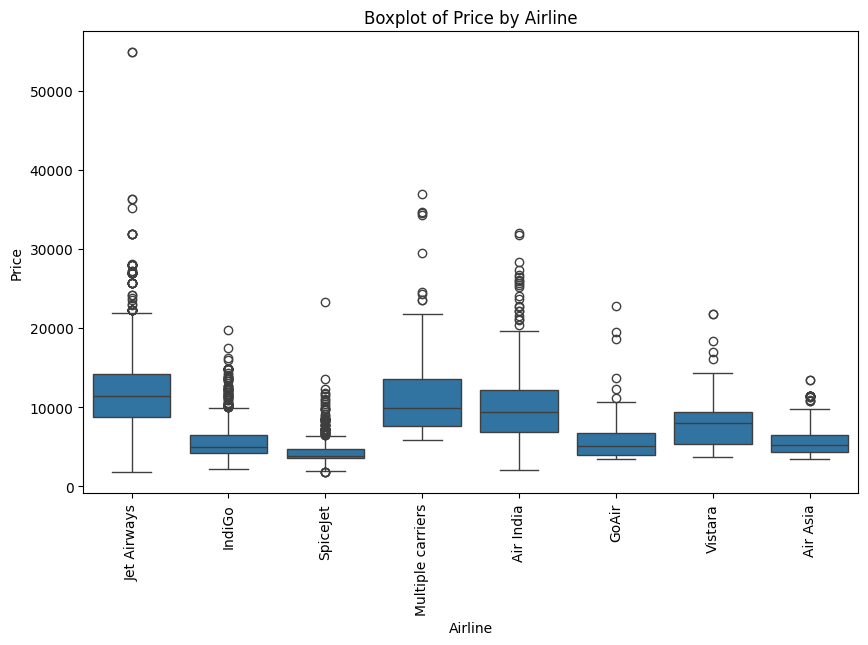

In [ ]:
#1. Check the values of the Additional_Info column
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Print the values and frequencies of "Additional_Info"
print("Value counts of 'Additional_Info':")
print(planes['Additional_Info'].value_counts())

# 2. Create a boxplot of "Price" versus "Airline"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=planes)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by Airline")
plt.show()

# 3. Decide how to handle missing values in "Additional_Info" and "Price":
# Based on the provided options and the nature of the data, here's an explanation of each choice:
#
# A. Remove the "Additional_Info" column and impute the mean for missing values of "Price".
# B. Remove "No info" values from "Additional_Info" and impute the median for missing values of "Price".
# C. Remove the "Additional_Info" column and impute the mean by "Airline" for missing values of "Price".
# D. Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price".
#
# We should carefully consider the effect of imputing the mean or median and the relationship between
# the airline and price. Removing the "Additional_Info" column is sensible if it doesn't add value.

# Answer:
choice = 'D'  # Option D seems the most appropriate if "Airline" is a significant factor for "Price"






# **Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the `"Additional_Info"` column from `planes`—the last step is to impute the missing data in the `"Price"` column of the dataset.

As a reminder, you generated a boxplot in your previous codecell, which suggested that imputing the median price based on the "Airline" is a solid approach! Therefore, you are going to implement your solution here.

**Instructions:**
1. Group `planes` by airline and calculate the median price.
2. Convert the grouped median prices to a dictionary.
3. Conditionally impute missing values for `"Price"` by mapping values in the `"Airline"` column based on `prices_dict`.
4. Check for remaining missing values.



In [ ]:
#1. Calculate median plane ticket prices by Airline
median_prices = planes.groupby('Airline')['Price'].median()

# Step 2: Convert the median prices to a dictionary
prices_dict = median_prices.to_dict()

# Step 3: Impute missing values in 'Price' based on 'Airline' using the dictionary
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# Step 4: Check for remaining missing values
remaining_missing = planes['Price'].isnull().sum()




# **Finding the number of unique values**

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

The `pandas` has been imported for you as `pd`, and the dataset has been stored as `planes`.

**Instructions:**
* Filter `planes` for columns that are of `"object"` data type.
* Loop through the columns in the dataset.
* Add the column iterator to the print statement, then call the function to return the number of unique values in the column.


In [ ]:
# Filter the DataFrame for object columns
object_columns = planes.select_dtypes(include='object')



# Step 2: Loop through the columns and print the number of unique values
for column in object_columns.columns:
    unique_values = planes[column].nunique()  # Get number of unique v



# **Flight duration categories**

As you saw in the previous exercise, there are `362` unique values in the `"Duration"` column of `planes`. Calling `planes["Duration"].head()`, we see the following values:
```
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
```
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a `"Duration_Category"` column in the `planes` DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

**Instructions:**
1. Create a list of categories containing `"Short-haul"`, `"Medium"`, and `"Long-haul"`.
2. Create `short_flights`, a string to capture values of `"0h"`, `"1h"`, `"2h"`, `"3h"`, or `"4h"` taking care to avoid values such as `"10h"`.
3. Create `medium_flights` to capture any values between five and nine hours.
4. Create `long_flights` to capture any values from 10 hours to 16 hours inclusive.




In [ ]:
#1. Create a list of categories
import re
categories = ["Short-haul", "Medium", "Long-haul"]

# Create patterns to capture different flight durations
short_flights = r'^[0-4]h\b'  # Matches 0h, 1h, 2h, 3h, or 4h but not 10h
medium_flights = r'^[5-9]h\b'  # Matches 5h to 9h
long_flights = r'^(1[0-6])h\b'  # Matches 10h to 16h

# Define a function to categorize flights
def categorize_duration(duration):
    if pd.isna(duration):
        return None
    if re.match(short_flights, duration):
        return "Short-haul"
    elif re.match(medium_flights, duration):
        return "Medium"
    elif re.match(long_flights, duration):
        return "Long-haul"
    else:
        return "Extra-long"

# Apply the categorization function to the Duration column

planes["Duration_Category"] = planes["Duration"].apply(categorize_duration)

# Check the result
print(planes[["Duration", "Duration_Category"]].head())


  Duration Duration_Category
0      19h        Extra-long
1   5h 25m            Medium
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m         Long-haul


# **Adding duration categories**

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables `flight_categories`, `short_flights`, `medium_flights`, and `long_flights` that you previously created in the previous codecell by you and are available to you.

Additionally, the following packages have been imported: `pandas as pd`, `numpy as np`, `seaborn as sns`, and `matplotlib.pyplot as plt`.

**Instructions:**
* Create conditions, a list containing subsets of `planes["Duration"]` based on `short_flights`, `medium_flights`, and `long_flights`.
* Create the `"Duration_Category"` column by calling a function that accepts your `conditions` list and `flight_categories`, setting values not found to `"Extreme duration"`.
* Create a plot showing the count of each category.


<ipython-input-10-35624ab4c6d2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes, x="Duration_Category", palette="viridis")


NameError: name 'plt' is not defined

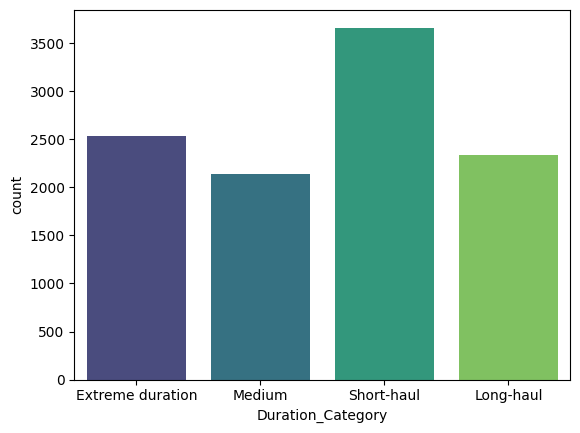

In [ ]:
# Create conditions for values in flight_categories to be created
import pandas as pd
import numpy as np
import seaborn as sns
planes = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/planes.csv?raw=True')
conditions = [
    planes["Duration"].str.match(short_flights, na=False),
    planes["Duration"].str.match(medium_flights, na=False),
    planes["Duration"].str.match(long_flights, na=False)
]

# Add the Duration_Category column
planes["Duration_Category"] = np.select(conditions, categories, default="Extreme duration")

# Plot the count of each duration category
sns.countplot(data=planes, x="Duration_Category", palette="viridis")
plt.title("Count of Flights by Duration Category")
plt.xlabel("Duration Category")
plt.ylabel("Number of Flights")
plt.show()




# **Flight duration**

You would like to analyze the duration of flights, but unfortunately, the `"Duration"` column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis. `seaborn` has been imported as `sns`.

**Instructions:**
1. Print the first five values of the `"Duration"` column from `planes` DataFrame.
2. Remove `"h" `from the column.
3. Convert the `"Duration"` column to float data type.
4. Plot a histogram of `"Duration"` values.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
planes = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/planes.csv?raw=True')#1. Preview the column

print(planes["Duration"].head())

# Step 2: Remove "h" from the column
planes["Duration"] = planes["Duration"].str.replace("h", "", regex=False)

# Step 3: Convert the "Duration" column to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Step 4: Plot a histogram of "Duration" values
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram
sns.histplot(planes["Duration"], bins=20, kde=False)
plt.title("Histogram of Flight Durations")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.show()


0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


ValueError: could not convert string to float: '5 25m'

# **Adding descriptive statistics**

Now `"Duration"` and `"Price"` both contain numeric values in the `planes` DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

**Instructions:**
1. Add a column to `planes` containing the standard deviation of `"Price"` based on `"Airline"`.

2. Calculate the median for `"Duration"` by `"Airline"`, storing it as a column called `"airline_median_duration"`.

3. Find the mean `"Price"` by `"Destination"`, saving it as a column called `"price_destination_mean"`.


In [3]:
#1. Price standard deviation by Airline
import pandas as pd

# Add a column with the standard deviation of "Price" based on "Airline"
planes["airline_price_std"] = planes.groupby("Airline")["Price"].transform("std")

# Add a column with the median of "Duration" by "Airline"
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform("median")

# Add a column with the mean "Price" by "Destination"
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform("mean")



print(planes[["Airline", "airline_price_st_dev"]].value_counts())


print(planes[["Airline","airline_median_duration"]].value_counts())



print(planes[["Destination","price_destination_mean"]].value_counts())

TypeError: agg function failed [how->median,dtype->object]

# **What to do with outliers**

Identifying and dealing with outliers is an integral step in performing exploratory data analysis.

In this exercise, you'll be presented with scenarios where outliers are present, and you need to decide what action you should take.

**Instructions:**
* Place each scenario into the appropriate bucket (either `"Leave outlier(s) in the dataset"` or `"Remove outlier(s)"`) depending on what approach should be taken to deal with the outlier(s). Print either of these two buckets corresponding to each scenario given below.
1. A basketball player averages 35 points per game when the average across the league is only 10 points per game.
2. A car speed is recorded as 5,000km/h.
3. The heights of different animals are recorded and one is more than 1.5 times the IQR plus the 75th percentile.
4. Countries have an average total area of 667,143 sq. km, but one country is recorded as 1,637,687 sq. km.
5. A temperature sensor has a recording of 100 degrees Celsius, but the sensor only functions correctly at temperatures of up to 80 degrees.
6. A participant in a study has an age of minus 35 years old.


In [ ]:
#1. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #1
print(------)

#2. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #2
print(------)

#3. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #3
print(------)

#4. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #4
print(------)

#5. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #5
print(------)

#6. Print either "Leave outlier(s) in the dataset" or "Remove outlier(s)" for #6
print(------)


# **Identifying outliers**

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the `"Price"` or `"Duration"` columns of the `planes` DataFrame.

`matplotlib.pyplot` and `seaborn` have been imported for you as `plt` and `sns` respectively.

**Instructions:**
1. Plot the distribution of `"Price"` column from `planes`.
2. Display the descriptive statistics for flight duration.
3. Which column potentially contains outliers? Choice and print either A, B, C or D in the codecell below.
* A. "Price"
* B. "Duration"
* C. "Price" and "Duration"
* D. Neither


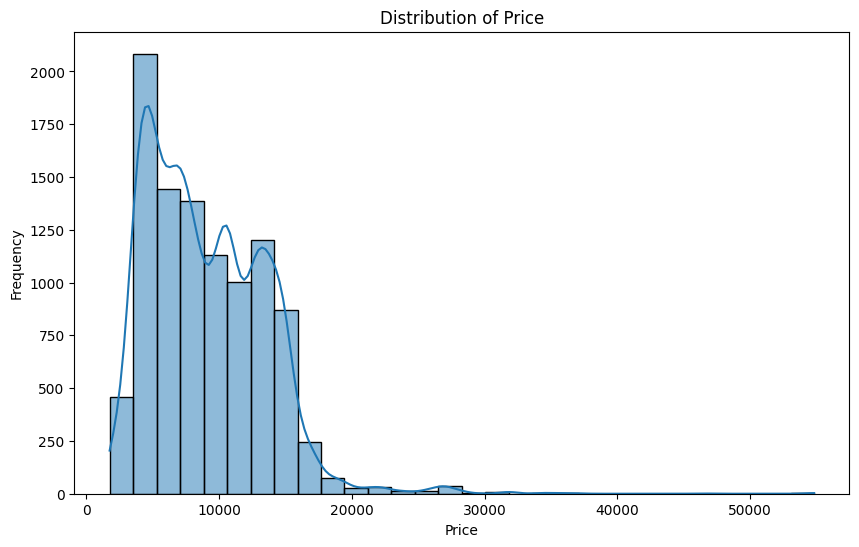

In [4]:
#1. Plot a histogram of flight prices
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume `planes` is the DataFrame containing the relevant data

# Plot the distribution of the "Price" column
plt.figure(figsize=(10, 6))
sns.histplot(planes['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics for the "Duration" column
duration_stats = planes['Duration'].describe()





# **Removing outliers**

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the `"Price"` is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the `planes` DataFrame.

`pandas` has been imported for you as `pd`, along with `seaborn` as `sns`.

**Instructions:**
1. Find the 75th and 25th percentiles, saving as `price_seventy_fifth` and `price_twenty_fifth` respectively.

2. Calculate the IQR, storing it as `prices_iqr`.

3. Calculate the upper and lower outlier thresholds.

4. Remove the outliers from `planes`.


In [6]:
#1. Find the 75th and 25th percentiles
# Step 1: Find the 25th and 75th percentiles
price_twenty_fifth = planes['Price'].quantile(0.25)
price_seventy_fifth = planes['Price'].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
price_iqr = price_seventy_fifth - price_twenty_fifth

# Step 3: Calculate the upper threshold for outliers
upper_threshold = price_seventy_fifth + (1.5 * price_iqr)

# Step 4: Filter out outliers based on the upper threshold
planes_filtered = planes[planes['Price'] <= upper_threshold]


price_twenty_fifth = planes['Price'].quantile(0.25)
lower_threshold = price_twenty_fifth - (1.5 * price_iqr)

#4. Remove the outliers from planes
planes = planes[(planes["Price"] < upper_threshold ) & (planes["Price"] > lower_threshold )]

print(planes["Price"].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price, dtype: float64
